# Linear Regression Example

For more projects: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 50 cost= 0.622627974 W= 0.662343 b= -2.16783
Epoch: 100 cost= 0.559620738 W= 0.637795 b= -1.99123
Epoch: 150 cost= 0.503886640 W= 0.614707 b= -1.82513
Epoch: 200 cost= 0.454587698 W= 0.592992 b= -1.66892
Epoch: 250 cost= 0.410979211 W= 0.572568 b= -1.52199
Epoch: 300 cost= 0.372406304 W= 0.55336 b= -1.38381
Epoch: 350 cost= 0.338286430 W= 0.535293 b= -1.25384
Epoch: 400 cost= 0.308105707 W= 0.518301 b= -1.1316
Epoch: 450 cost= 0.281410009 W= 0.50232 b= -1.01663
Epoch: 500 cost= 0.257796228 W= 0.487289 b= -0.908499
Epoch: 550 cost= 0.236909270 W= 0.473152 b= -0.8068
Epoch: 600 cost= 0.218434095 W= 0.459856 b= -0.711149
Epoch: 650 cost= 0.202092052 W= 0.447351 b= -0.621185
Epoch: 700 cost= 0.187637255 W= 0.435589 b= -0.536573
Epoch: 750 cost= 0.174851745 W= 0.424527 b= -0.456993
Epoch: 800 cost= 0.163542747 W= 0.414123 b= -0.382147
Epoch: 850 cost= 0.153539971 W= 0.404338 b= -0.311752
Epoch: 900 cost= 0.144692361 W= 0.395134 b= -0.245544
Epoch: 950 cost= 0.136866584 W= 0.386478 b=

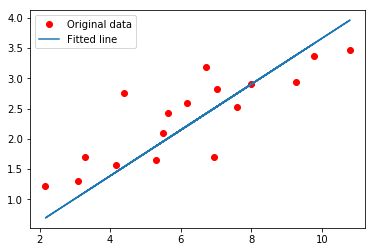

In [19]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()